**Josh Hellings** - Data Science 2024

---

Import the required packages.

In [ ]:
import requests     # for making web / API calls
from bs4 import BeautifulSoup   # For parsing the HTML into something we can search

# Scraper: ECO

### 1. Scraping the page.

Like we used `requests` to fetch data from an API, we can use it to request the HTML of a website.

In [ ]:
url = 'https://www.economicsobservatory.com/answers'

response = requests.get(url)

Let's inspect what was returned

In [ ]:
response.text

'<!DOCTYPE html><html lang="en" class=""><head><script data-no-optimize="1">var litespeed_docref=sessionStorage.getItem("litespeed_docref");litespeed_docref&&(Object.defineProperty(document,"referrer",{get:function(){return litespeed_docref}}),sessionStorage.removeItem("litespeed_docref"));</script> <meta charset="UTF-8"><link data-optimized="2" rel="stylesheet" href="https://www.economicsobservatory.com/wp-content/litespeed/css/3a538e61b1f914d4089094781335e9c1.css?ver=8427e" /><meta name="viewport" content="width=device-width, initial-scale=1.0"><meta name="format-detection" content="telephone=no"><meta http-equiv="X-UA-Compatible" content="ie=edge"><title>Answers by Topic - Economics Observatory</title><link rel="apple-touch-icon" sizes="180x180" href="https://www.economicsobservatory.com/wp-content/themes/economics-observatory/assets/images/favicons/apple-touch-icon.png?v=1"><link rel="icon" type="image/png" sizes="32x32" href="https://www.economicsobservatory.com/wp-content/themes/

So we've got a lot of code and text that looks something like HTML. *But*, currently it is just in the standard string format, so to search through it using HTML tags & attributes, we need to **parse** it into something searchable.

For this, we can use BeautifulSoup.

In [ ]:
# Pass our returned data to the `BeautifulSoup` function.
soup = BeautifulSoup(response.text)

`soup` - searchable object representation.

Essentially, it turns our HTML string into a heirarchical, tree-like structure, which we can search through using a selection of `BeautifulSoup` methods.

In [ ]:
soup.title

<title>Answers by Topic - Economics Observatory</title>

In [ ]:
# Use prettify to add formatting and only show the first 1000 characters.
print(soup.prettify()[:1000])

<!DOCTYPE html>
<html class="" lang="en">
 <head>
  <script data-no-optimize="1">
   var litespeed_docref=sessionStorage.getItem("litespeed_docref");litespeed_docref&&(Object.defineProperty(document,"referrer",{get:function(){return litespeed_docref}}),sessionStorage.removeItem("litespeed_docref"));
  </script>
  <meta charset="utf-8"/>
  <link data-optimized="2" href="https://www.economicsobservatory.com/wp-content/litespeed/css/3a538e61b1f914d4089094781335e9c1.css?ver=8427e" rel="stylesheet"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="telephone=no" name="format-detection"/>
  <meta content="ie=edge" http-equiv="X-UA-Compatible"/>
  <title>
   Answers by Topic - Economics Observatory
  </title>
  <link href="https://www.economicsobservatory.com/wp-content/themes/economics-observatory/assets/images/favicons/apple-touch-icon.png?v=1" rel="apple-touch-icon" sizes="180x180"/>
  <link href="https://www.economicsobservatory.com/wp-content/the

In [ ]:
len(soup.find_all('li'))

66

By inspecting the page HTML, we can see that the information for each article is contained within a list (`<li>`) element. However, the list element has no other distinct attributes that allow us to search for them. So, if we use `soup.find_all('li')`, we will just get every `<li>` element on the page, which likely includes other bits of the HTML that we don't want.

One solution to this is to use *chaining*. Essentially, instead of searching directly for our list elements, we should find a **parent** HTML element that contains our articles list. After filtering for just this part of the page, then we can perform the same search for our list elements and it should just return the information we want.

In [ ]:

target_div = soup.find('div', class_='answers__listing-left')

articles = target_div.find_all('li')

How many articles (list items) are there?

In [ ]:
print(f"We've found {len(articles)} articles")

We've found 50 articles


Let's test extracting information from one.

In [ ]:
# Select the first item in the list
article1 = articles[0]

article1.find('a', class_='primary-category').get_text()

'Trade & supply chains'

In [ ]:


# Get the article category
print(article1.find('a', class_='primary-category'))




<a class="primary-category" href="https://www.economicsobservatory.com/topics/trade-supply-chains">Trade &amp; supply chains</a>


In [ ]:
## TODO: Get the article title



In [ ]:
## TODO: Get the publish date



<br>
<br>

---

<br>

### Part 2. Scraping an article

Now, let's try scraping some information from a recent article.

In [ ]:
url = 'https://www.economicsobservatory.com/how-might-a-wider-middle-east-conflict-affect-the-global-economy'
response = requests.get(url)

soup = BeautifulSoup(response.text)

# View the first 1000 characters in the HTML
print(soup.prettify()[:1000])

<!DOCTYPE html>
<html class="" lang="en">
 <head>
  <script data-no-optimize="1">
   var litespeed_docref=sessionStorage.getItem("litespeed_docref");litespeed_docref&&(Object.defineProperty(document,"referrer",{get:function(){return litespeed_docref}}),sessionStorage.removeItem("litespeed_docref"));
  </script>
  <meta charset="utf-8"/>
  <link data-optimized="2" href="https://www.economicsobservatory.com/wp-content/litespeed/css/3a538e61b1f914d4089094781335e9c1.css?ver=8427e" rel="stylesheet"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="telephone=no" name="format-detection"/>
  <meta content="ie=edge" http-equiv="X-UA-Compatible"/>
  <title>
   How might a wider Middle East conflict affect the global economy? - Economics Observatory
  </title>
  <link href="https://www.economicsobservatory.com/wp-content/themes/economics-observatory/assets/images/favicons/apple-touch-icon.png?v=1" rel="apple-touch-icon" sizes="180x180"/>
  <link href="ht

<br>

Get the article title.

In [ ]:
soup.find('h1', class_='article__title')

<h1 class="article__title">How might a wider Middle East conflict affect the global economy?</h1>

This returns the whole HTML element that matches our search. What if we want just the text?

Use `.text` or `.get_text()`

In [ ]:
soup.find('h1', class_='article__title').get_text()

'How might a wider Middle East conflict affect the global economy?'

<br>

Get the article category

In [ ]:
soup.find('a', class_='primary-category')

<a class="primary-category" href="https://www.economicsobservatory.com/topics/trade-supply-chains">Trade &amp; supply chains</a>

<br>

Get the entire article text.

In [ ]:
soup.find('article', class_='article__content').get_text()

"The world economy is underperforming as a result of tight monetary policies, weaker global trade, a slowing Chinese economy and uncertainty around the US election. An escalation of conflict in the Middle East could increase uncertainties, harming inflation reduction efforts and hurting growth.It has been over a year since the Hamas-led attack on Israel. Israel’s response in Gaza has resulted in widespread destruction and significant loss of life. The conflict has since expanded beyond Gaza, involving the Houthis in Yemen, Hezbollah in Lebanon and Iranian strikes targeting Israel.In addition to the awful humanitarian cost of the conflicts, the war and the possibility of its further expansion pose significant repercussions for the global economy. This article discusses three potential ways in which the current conflict and a wider conflict in the Middle East could affect the global economy.Increased geopolitical uncertaintiesFirst and foremost, an escalation of the Middle East conflict 

In [ ]:
soup.find('article', class_='article__content').get_text()

"The world economy is underperforming as a result of tight monetary policies, weaker global trade, a slowing Chinese economy and uncertainty around the US election. An escalation of conflict in the Middle East could increase uncertainties, harming inflation reduction efforts and hurting growth.It has been over a year since the Hamas-led attack on Israel. Israel’s response in Gaza has resulted in widespread destruction and significant loss of life. The conflict has since expanded beyond Gaza, involving the Houthis in Yemen, Hezbollah in Lebanon and Iranian strikes targeting Israel.In addition to the awful humanitarian cost of the conflicts, the war and the possibility of its further expansion pose significant repercussions for the global economy. This article discusses three potential ways in which the current conflict and a wider conflict in the Middle East could affect the global economy.Increased geopolitical uncertaintiesFirst and foremost, an escalation of the Middle East conflict 

<br>

##### **Visualisation**

Let's visualise the text in this article using a word cloud, using `WordCloud` and `Matplotlib`

In [ ]:
# Install packges: wordcloud and matlotlib
!pip install wordcloud matplotlib --quiet

In [ ]:
# Import the packages we just installed
from wordcloud import WordCloud
import matplotlib.pyplot as plt

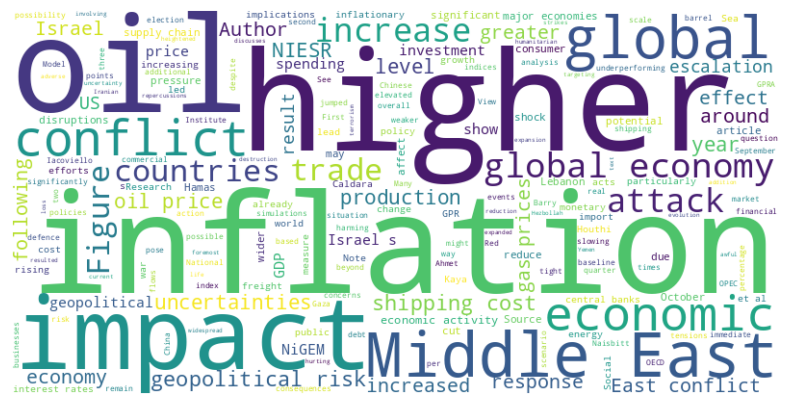

In [ ]:
# Assuming `article_text` contains your article text
article_text = soup.find('article', class_='article__content').get_text(separator=';')

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(article_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Note**: The WordCloud module automatically removes common stopwords like "and," "the," and "of." It uses a predefined list of stopwords to filter out these high-frequency, low-value words by default. We could also add or customise stopwords if we want to remove additional terms specific to our content.